### Neuron

Create a single neuron to be used in neural network

You will have access to list Neuron.Examples, where each example is a dictionary with two keys `features` and `label`. The value of `features` is a list of 3 features, which have been min-max scaled for youand the value of `label` is `0` or `1`

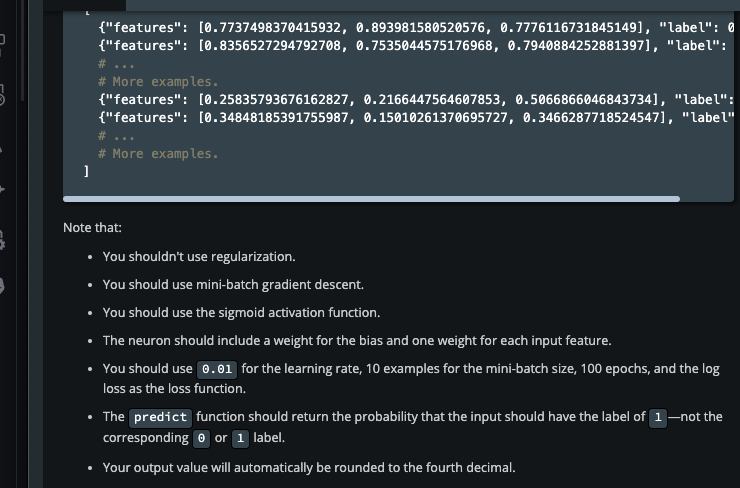

In [ ]:
'''
Pseudo Code and Comments
1. z = x.w + b, f(z) = sigmoid activation
2. Loss = Sum (over m) (y_hat_i - y_i) / m
3. Calculate partial derivative_w_i = sum_m ((y_hat_i - y_i).X_i )/ m
4. m = mini batch size
5. Update the weight = weight - learning_rate * partial derivate
6. If we have 9 examples, then 3 minibatch, and 1 epoch 
7. Training:
    a. for epoch:
        b. for mini-batch:
            get_predictions
            get_gradient
            update_weights
8. Predictions:
    a. Forward_pass (features)
'''

import numpy as np
import math

class Neuron:
    # Don't change anything in the `__init__` function.
    def __init__(self, examples):
        np.random.seed(42)
        # Three weights: one for each feature and one more for the bias.
        self.weights = np.random.normal(0, 1, 3 + 1)
        self.examples = examples
        self.train()

    # Don't use regularization.
    # Use mini-batch gradient descent.
    # Use the sigmoid activation function.
    # Use the defaults for the function arguments.
    def train(self, learning_rate=0.01, batch_size=10, epochs=200):
        # Write your code here.
        for _ in range(epochs):
            for batch_window in range(len(self.examples) // batch_size):
                mini_batch = self.examples[0 + (batch_size * batch_window): batch_size + (batch_size * batch_window)]
                predictions_labels = [
                    {"prediction": self.predict(example["features"]), "label":example["label"]}
                    for example in mini_batch
                ]
                gradients = self.__get_gradients(mini_batch, predictions_labels)
                self.weights = self.weights - [learning_rate * gradient for gradient in gradients]
                
                

    # Return the probability—not the corresponding 0 or 1 label.
    def predict(self, features):
        # Write your code here.
        model_inputs = features + [1]
        wTx = 0
        for i, model_input in enumerate(model_inputs):
            wTx = wTx + self.weights[i] * model_input
        return 1 / (1 + math.exp(-wTx))
        

    def __get_gradients(self, batch, predictions_labels):
        errors = [
            predictions_label["prediction"] - predictions_label["label"] for predictions_label in predictions_labels
        ]
        gradients = [0] * len(self.weights)
        for example_i, example in enumerate(batch):
            features = example["features"] + [1]
            for feature_i, feature in enumerate(features):
                gradients[feature_i] = gradients[feature_i] + errors[example_i] * feature
        gradients = [gradient / len(batch) for gradient in gradients]
        return gradients